# Memprediksi Image Fashion (Image Recognition)

## PyTorch Workflow
   1. Dataset dan Dataloader Preparation
   2. Arsitektur dan Config
   3. Training Preparation -> (MCOC)
   4. Training Model

## Import Package

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_roc_curve, plot_pr_curve
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
import itertools

In [3]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## Dataset dan Dataloader

In [7]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [8]:
bs = 128 #batch

#Dataengineering (transformasi)
#fungsi transform >> image diubah ke grayscale >> diubah ke tensor
transform = transforms.Compose([
        transforms.Grayscale(),
        transforms.ToTensor()
])

train_set = datasets.ImageFolder("data/data/train/", transform=transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=2)

test_set = datasets.ImageFolder("data/data/test/", transform=transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

In [9]:
loader = iter(trainloader)
images, labels = next(loader)
images.shape

torch.Size([128, 1, 28, 28])

In [10]:
labels

tensor([2, 9, 1, 3, 6, 4, 7, 9, 7, 5, 4, 0, 6, 7, 9, 4, 9, 3, 2, 4, 1, 2, 8, 9,
        1, 6, 3, 9, 5, 4, 2, 9, 1, 5, 9, 2, 5, 9, 4, 6, 6, 1, 9, 5, 1, 3, 6, 1,
        1, 3, 0, 3, 1, 5, 7, 0, 8, 5, 2, 5, 9, 1, 2, 5, 0, 8, 5, 4, 7, 1, 0, 5,
        6, 8, 0, 7, 9, 3, 8, 5, 2, 0, 9, 7, 5, 2, 4, 7, 9, 0, 0, 8, 1, 4, 6, 6,
        5, 1, 0, 6, 4, 5, 6, 1, 7, 5, 0, 3, 0, 0, 3, 9, 1, 6, 3, 4, 8, 6, 1, 9,
        6, 6, 7, 7, 1, 6, 8, 8])

In [11]:
#konversi label menjadi kategori
label2cat = train_set.classes
label2cat

['Ankle boot',
 'Bag',
 'Coat',
 'Dress',
 'Pullover',
 'Sandal',
 'Shirt',
 'Sneaker',
 'T-shirt or Top',
 'Trouser']

In [12]:
label2cat[5]

'Sandal'

### Visualize Data

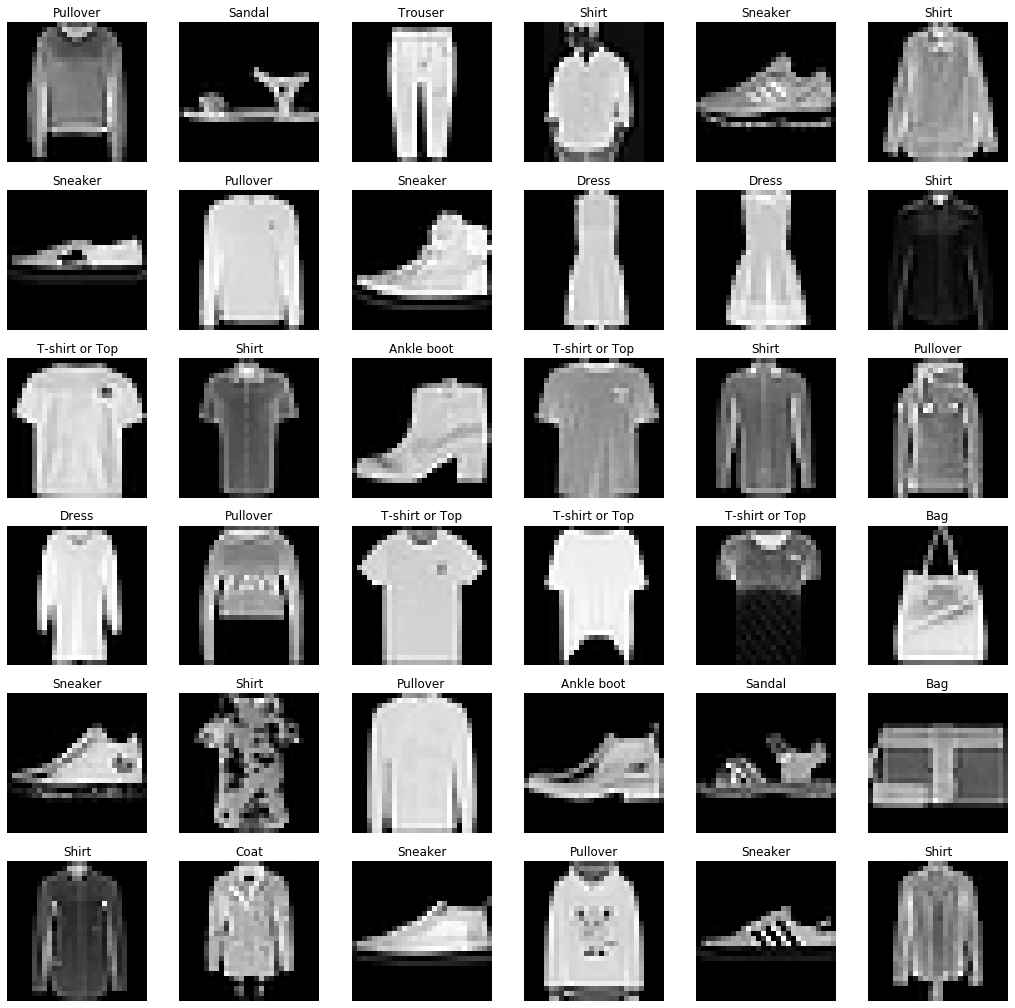

In [9]:
fig, axes = plt.subplots(6, 6, figsize=(18, 18))
for img, label, ax in zip(images, labels, axes.flatten()):
    ax.imshow(img.view(28,28).cpu(), cmap='gray')
    label = label2cat[label.item()]
    ax.set_title(f"{label}")
    ax.axis('off');

## Arsitektur dan Config

In [13]:
from jcopdl.layers import linear_block

In [14]:
class NN(nn.Module):
    def __init__(self, input_size, n1, n2, output_size, dropout):
        super().__init__()
        
        self.fc = nn.Sequential(
        nn.Flatten(),  
        linear_block(input_size, n1, activation='relu', dropout=dropout),
        linear_block(n1, n2, activation='relu', dropout=dropout),
        linear_block(n2, output_size, activation='lsoftmax')
        
        )
        
    def forward(self, x):
        return self.fc(x)

In [15]:
config = set_config({
    
    "input_size" : 784,
    "n1" : 256,
    "n2" : 64,
    "output_size" : 10,
    "dropout" : 0.1,
    "autor" : "Ridho Alhafizhi",
    "batch_size" : bs
       
})

## Training Preparation MCOC

In [16]:
model = NN(config.input_size, config.n1, config.n2, config.output_size, config.dropout).to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())
callback = Callback(model, config, outdir="model", early_stop_patience=1)

## Training

In [17]:
#progressbar
from tqdm.auto import tqdm

<< Training >> :   0%|                                                                         | 0/313 [00:00<?, ?it/s]


Epoch     1
Train_cost  = 0.7059 | Test_cost  = 0.4692 | Train_score = 0.7550 | Test_score = 0.8325 |


<< Training >> :   0%|                                                                         | 0/313 [00:00<?, ?it/s]


Epoch     2
Train_cost  = 0.4547 | Test_cost  = 0.4008 | Train_score = 0.8384 | Test_score = 0.8535 |


<< Training >> :   0%|                                                                         | 0/313 [00:00<?, ?it/s]


Epoch     3
Train_cost  = 0.3991 | Test_cost  = 0.3741 | Train_score = 0.8580 | Test_score = 0.8619 |


<< Training >> :   0%|                                                                         | 0/313 [00:00<?, ?it/s]


Epoch     4
Train_cost  = 0.3712 | Test_cost  = 0.3618 | Train_score = 0.8637 | Test_score = 0.8679 |


<< Training >> :   0%|                                                                         | 0/313 [00:00<?, ?it/s]


Epoch     5
Train_cost  = 0.3483 | Test_cost  = 0.3403 | Train_score = 0.8740 | Test_score = 0.8742 |


<< Testing >> : 100%|████████████████████████████████████████████████████████████████| 157/157 [00:11<00:00, 13.45it/s]



Epoch     6
Train_cost  = 0.3324 | Test_cost  = 0.3459 | Train_score = 0.8801 | Test_score = 0.8734 |
==> EarlyStop patience =  1 | Best test_score: 0.8742
==> Execute Early Stopping at epoch: 6 | Best test_score: 0.8742
==> Best model is saved at model


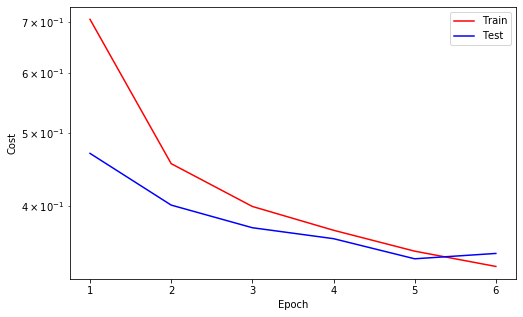

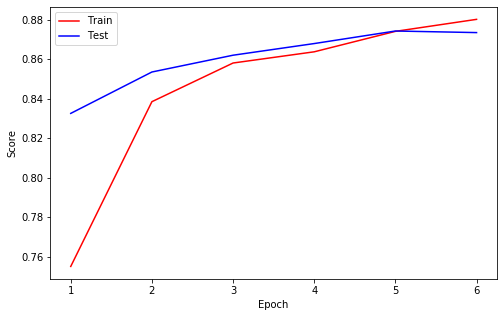

In [18]:
#Training
while True: #infinite looping dan akan di handle oleh callback sampai early stop
    model.train()

    cost = 0 
    correct = 0 #score
    
    for images, labels in tqdm(trainloader, desc='<< Training >> '): 
        images, labels = images.to(device), labels.to(device) #pindahkan ke device
        
        output = model(images) #masukan data ke dalam model
        loss = criterion(output, labels) #perbedaan output dgn data
        loss.backward() #backpropagation

        optimizer.step() #update weight
        optimizer.zero_grad() #reset gradiennya kembali ke 0
        
        cost += loss.item() *images.shape[0] #hitung cost per minibatch
        correct += (output.argmax(1) == labels).sum().item() #output dibandingkan dgn labels (berapa banyak yg benar)

    train_cost = (cost / len(train_set)) #reporting cost rata-rata
    train_score = correct / len(train_set) #reporting score rata-rata

    #Testing
    with torch.no_grad(): #tdk simpan komputasinya pada testing (menghemat memori)
        model.eval()
            
        cost = 0 
        correct = 0 #score
            
        for images, labels in tqdm(testloader, desc="<< Testing >> "):
            images, labels = images.to(device), labels.to(device) #pindahkan ke device
        
            output = model(images) #masukan data ke dalam model
            loss = criterion(output,labels) #perbedaan output dgn data

            cost += loss.item() *images.shape[0] #hitung cost per minibatch
            correct += (output.argmax(1) == labels).sum().item() #output dibandingkan dgn labels (berapa banyak yg benar)

    test_cost = (cost / len(test_set)) #reporting cost rata-rata
    test_score = correct / len(test_set) #reporting score
      
            
    # Callback
    # Logging and Reporting 
    callback.log(train_cost, test_cost, train_score, test_score)

    # Checkpoint #sesuai default diatas, save stiap 50 epoch
    callback.save_checkpoint() 

    # Runtime Plotting #setiap 20 epoch di plot
    callback.cost_runtime_plotting() 
    callback.score_runtime_plotting()

    # Early Stopping
    if callback.early_stopping(model, monitor='test_score'):
        callback.plot_cost()
        callback.plot_score()
        break

## Plot Confusion Matrix

F1 score: 0.874200
Accuracy score: 0.874200


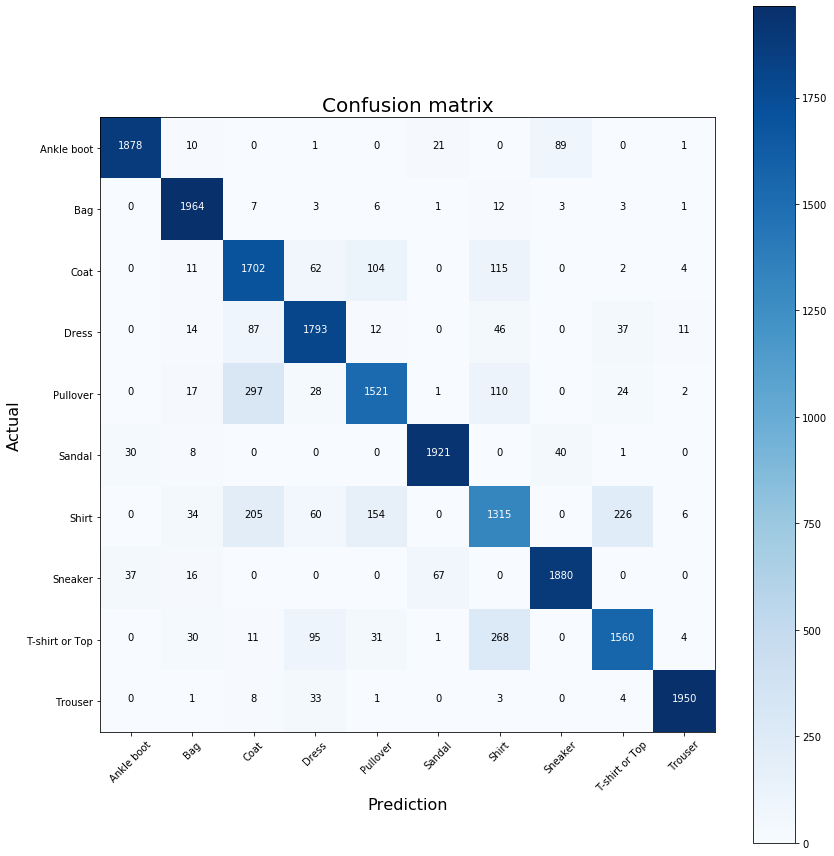

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        cm
    
    plt.imshow(cm, interpolation=None, cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual', fontsize=16)
    plt.xlabel('Prediction',fontsize=16)
    

# Graphical analytics
def predictionsplot(model, device, testloader):
        model.eval()
        actuals = []
        predictions = []
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                output = model(images)
                prediction = output.argmax(dim=1, keepdim=True)
                actuals.extend(labels.view_as(prediction))
                predictions.extend(prediction)
        return [i.item() for i in actuals], [i.item() for i in predictions]

actuals, predictions = predictionsplot(model, device, testloader)
cm = confusion_matrix(actuals, predictions)
names = (train_set.classes)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cm, names)

print('F1 score: %f' % f1_score(actuals, predictions, average='micro'))
print('Accuracy score: %f' % accuracy_score(actuals, predictions))

## Plot ROC AUC

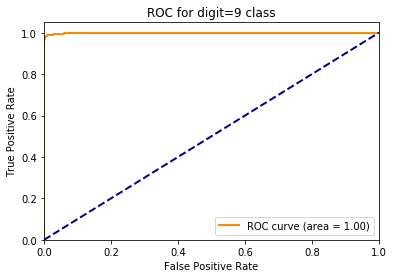

In [24]:
def test_class_probabilities(model, device, testloader, which_class):
    model.eval()
    actuals = []
    probabilities = []
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            output = model(images)
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(labels.view_as(prediction) == which_class)
            probabilities.extend(np.exp(output[:, which_class]))
    return [i.item() for i in actuals], [i.item() for i in probabilities]

which_class = 9
actuals, class_probabilities = test_class_probabilities(model, device, testloader, which_class)

fpr, tpr, _ = roc_curve(actuals, class_probabilities)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for digit=%d class' % which_class)
plt.legend(loc="lower right")
plt.show()

## Load Model Terbaik

In [219]:
weights = torch.load("model/weights_best.pth", map_location="cpu")
model.load_state_dict(weights)
model = model.to(device)

## Predict

In [220]:
images, labels = next(iter(testloader)) #mengambil image
images, labels = images.to(device), labels.to(device)

In [221]:
with torch.no_grad(): #tdk simpan komputasinya pada testing (menghemat memori)
        model.eval()
        output = model(images) #masukan data ke dalam model
        
        preds = output.argmax(1)
preds
             

tensor([8, 5, 6, 3, 3, 7, 2, 8, 8, 0, 3, 6, 7, 7, 5, 3, 7, 9, 5, 5, 2, 7, 0, 6,
        9, 2, 3, 6, 0, 7, 3, 6, 4, 4, 7, 6, 2, 0, 6, 3, 7, 0, 6, 2, 4, 7, 5, 5,
        9, 5, 9, 3, 5, 6, 7, 1, 1, 3, 1, 1, 9, 3, 8, 6, 5, 4, 9, 3, 8, 8, 4, 2,
        1, 0, 4, 1, 5, 8, 5, 5, 1, 5, 9, 6, 8, 4, 0, 2, 8, 5, 4, 9, 8, 5, 3, 8,
        7, 2, 7, 9, 2, 4, 8, 9, 7, 5, 3, 0, 2, 1, 3, 2, 4, 9, 2, 8, 7, 5, 9, 9,
        0, 7, 6, 4, 9, 3, 5, 9])

In [222]:
train_set.class_to_idx

{'Ankle boot': 0,
 'Bag': 1,
 'Coat': 2,
 'Dress': 3,
 'Pullover': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt or Top': 8,
 'Trouser': 9}

In [223]:
preds == labels

tensor([ True,  True, False,  True,  True, False,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True, False, False,  True,
        False,  True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False,  True,  True,  True,  True])

## Visualize Predict

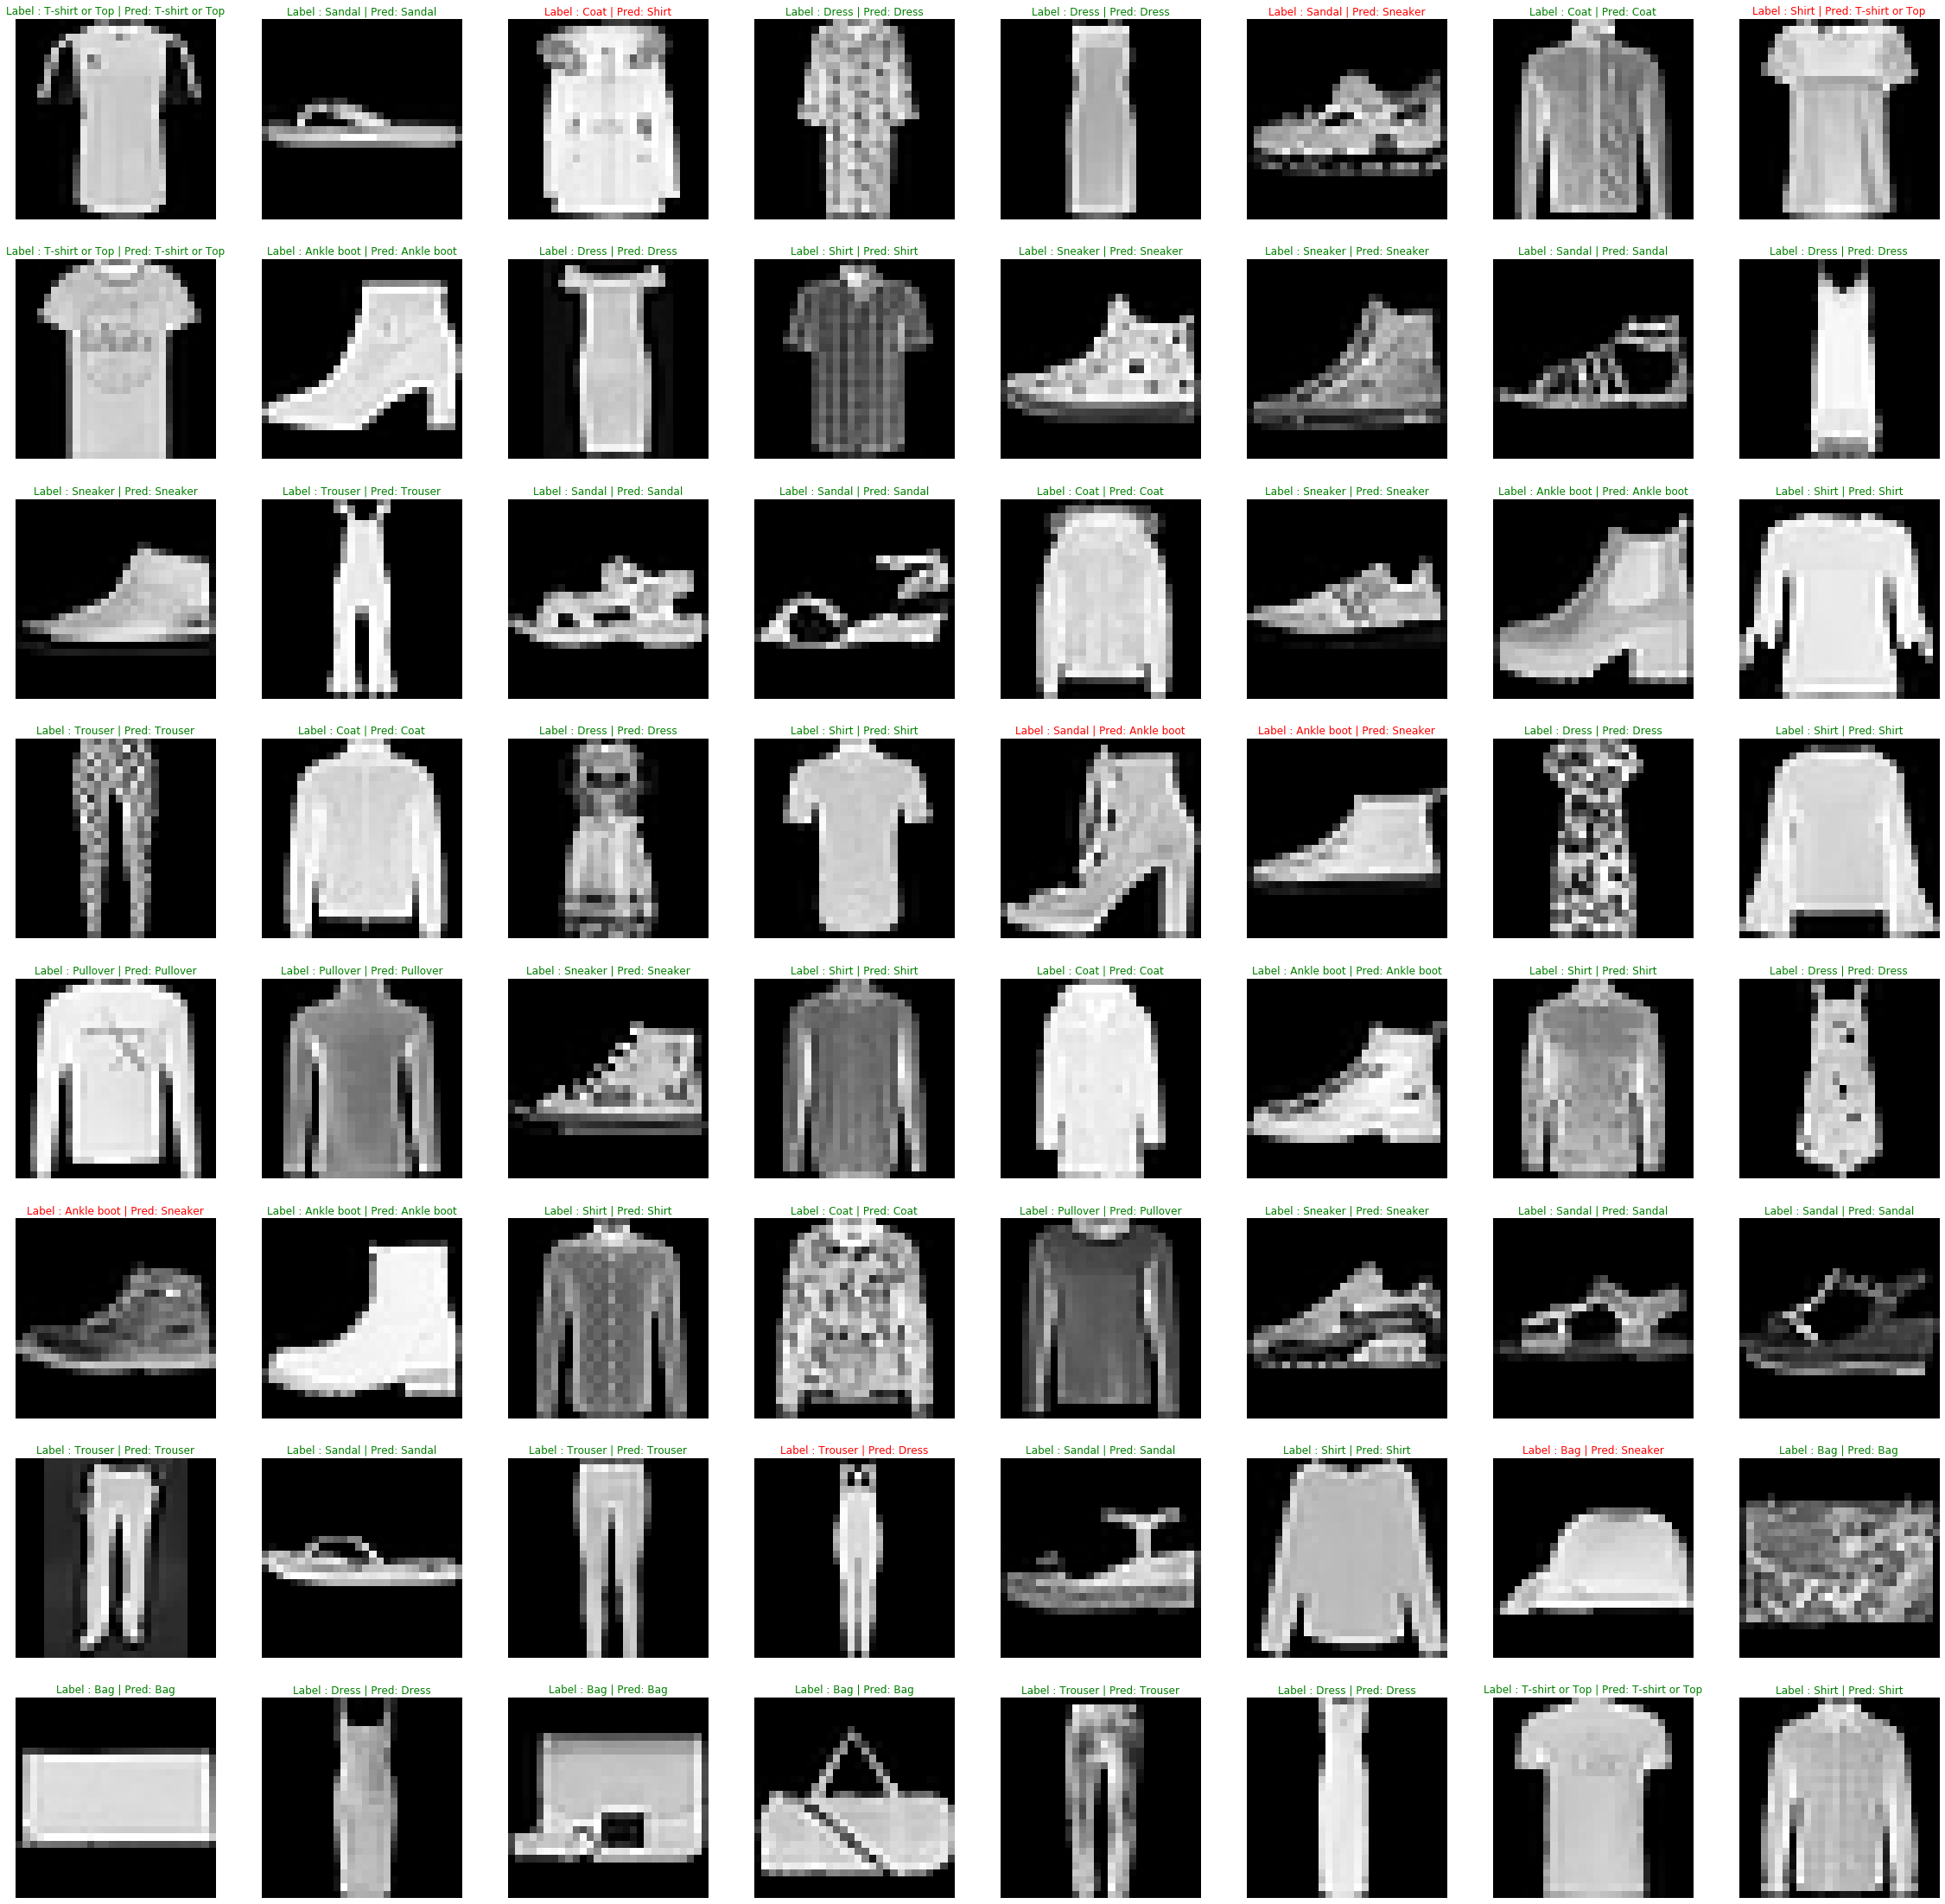

In [224]:
fig, axes = plt.subplots(8,8, figsize=(40,40))
for img, label, pred, ax in zip(images, labels, preds, axes.flatten()):
    font = {"color" : "g"} if label == pred else {"color":"r"}
    
    ax.imshow(img.view(28,28).cpu(), cmap='gray')
    font = {"color" : "g"} if label == pred else {"color":"r"}
    label, pred = label2cat[label.item()], label2cat[pred.item()]
    ax.set_title(f"Label : {label} | Pred: {pred}", fontdict=font)
    ax.axis("off");